# Orbital Mechanics HW1:

### Name: Aziz Alwatban  $\hspace{4cm}$        Date: 29/10/2021

## Problem 1:

### Part a)

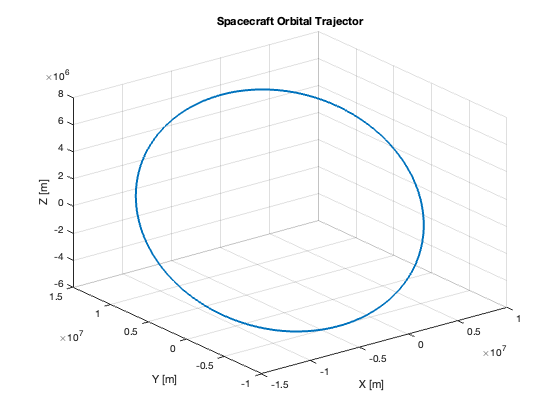

### Part b)
Tolerance: $10^{-3}$

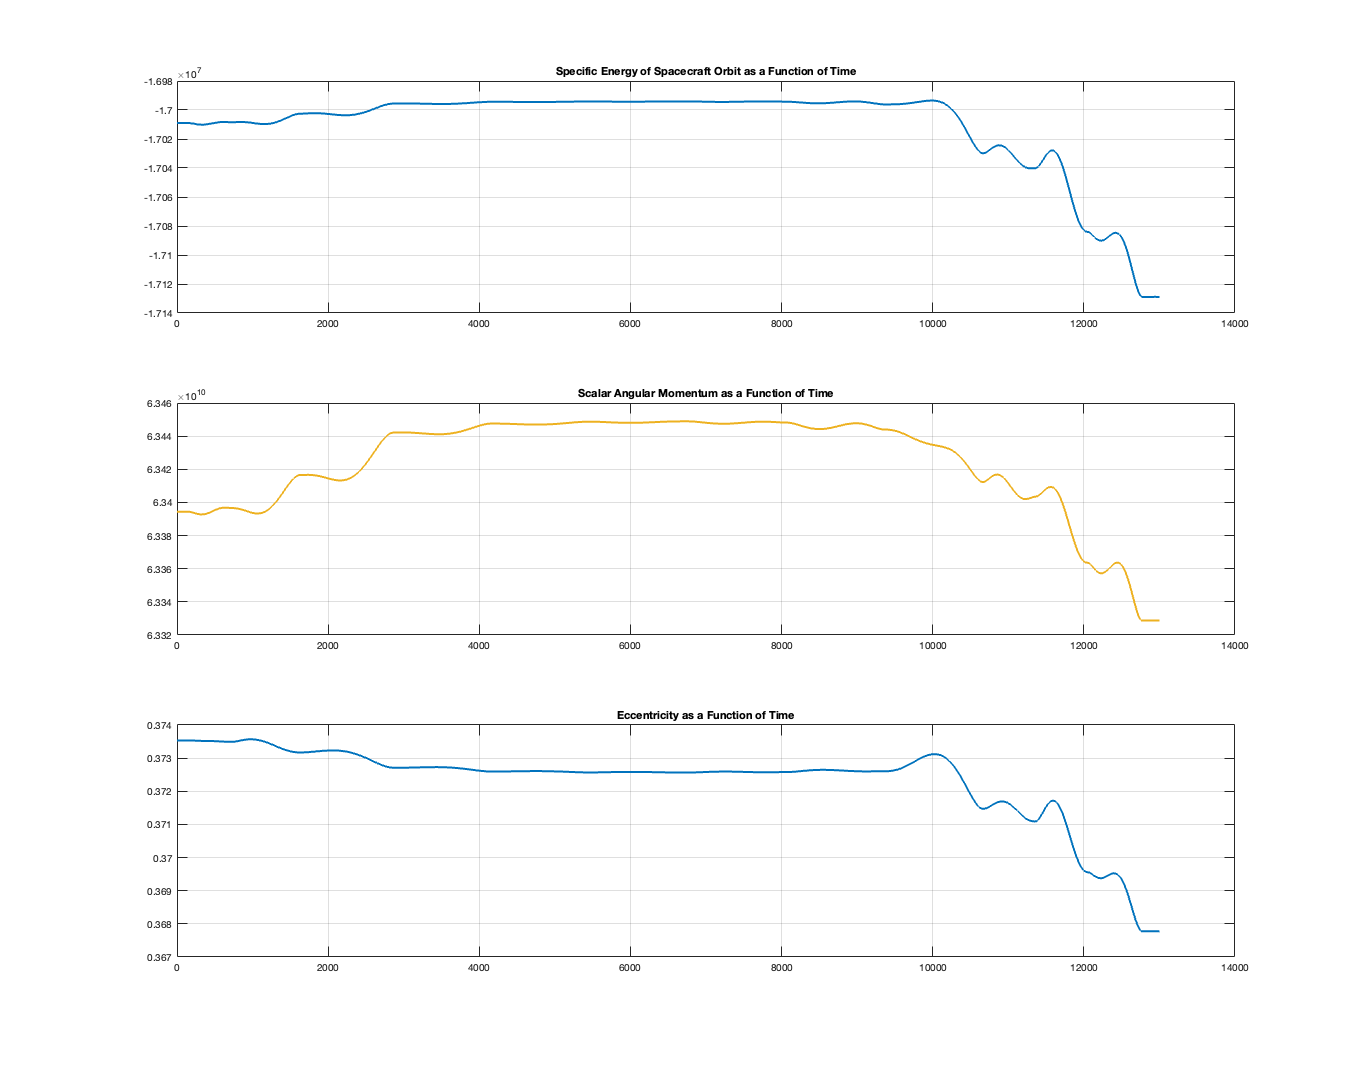

Tolerance: $10^{-6}$

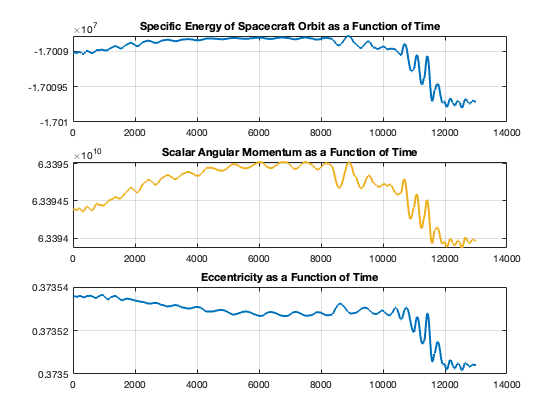

Tolerance: $10^{-12}$

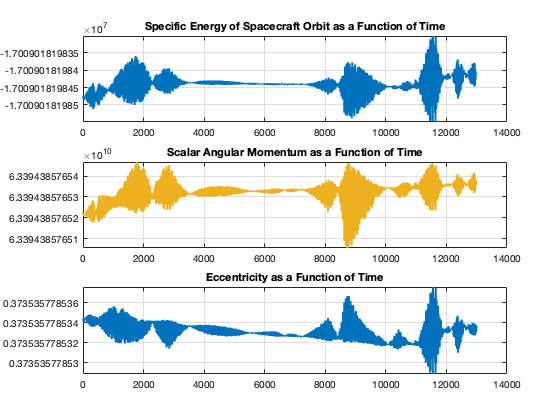

### Part c)

All of the three plots are fairly constant throughout the trajectory (the plot scale just magnify these diferrences). When decreasing the tolerance to 1e-12, we notice there is high noise in the simulation as seen by the increased oscillations. The reason for this is that the ode45 increases its timestep when lowering the tolerance which results in more data taken closer to each other and thus more noise.

### Part d)
See appendix

## Problem 2:

In [4]:
import numpy as np
import sympy as sm
sin, cos, pi= np.sin, np.cos, np.pi

rp = 420
ra = 426

### Part a)
$\frac{r_p}{r_a} = \frac{1-e}{1+e}$

In [9]:
e = sm.Symbol('e')
e= sm.solvers.solve(rp/ra - (1-e)/(1+e), e)
e = e[0]
e

0.00709219858156028

In [7]:
a = sm.Symbol('a')
a = sm.solvers.solve(rp - a*(1-e), a)
print("Semi-major axis is {:.0f} km and the eccentricity is {}".format(a[0], e))

Semi-major axis is 423 km and the eccentricity is 0.00709219858156028


### Part b)

In [13]:
mu = 3.986*10**14
Vp = ((1+e)/(1-e))**0.5 * (mu/a[0]) 
print("Velocity at perigee is equal to {} km/s".format(Vp/1000))
Va = ((1-e)/(1+e))**0.5 * (mu/a[0]) 
print("Velocity at apogee is equal to {} km/s".format(Va/1000))

Velocity at perigee is equal to 949023.750541169 km/s
Velocity at apogee is equal to 935657.218843407 km/s


### Part c)

In [14]:
Energy=-mu/(2*a[0])
P = rp*(1+e)
h = (mu * P)**0.5
print("Specific energy is {:.2f} m^2/s^2".format(Energy))
print("Semi-Latus recutm is {:.2f} m".format(P))
print("Angular momentum is {:.2f} m^2/s".format(h))

Specific energy is -471158392.43 m^2/s^2
Semi-Latus recutm is 422978.72 m
Angular momentum is 12984580052.85 m^2/s


# Problem 3:

$ V_{\theta} = v cos(\gamma) = r  \dot{\theta}  \\$
$ \vec{h} = \vec{r} \times \vec{\dot{r}} \rightarrow h = r \cdot v_{\theta} = \frac{P}{1+e\cdot cos(f)} \cdot v cos(\gamma)$


$V_a = r_a \cdot \dot{\theta}_a = \frac{P}{1-e} \dot{\theta}_a$ <br>
$V_p = r_p \cdot \dot{\theta}_p  = \frac{P}{1+e}\dot{\theta}_p$ <br>
$\dot{\theta}_a = \dot{\theta}_p \cdot \frac{1-e}{1+e} $

we notice that the velocity at apogee is equal to the velocity at perigee multiplied by a constant less than 1. That means as the vehicle approaches the furthest approach (maximum r), the velocity decreases and thus the angular momentum is conserved.

# Problem 4:

In [16]:
r = np.array([1.5, 1, 0.8])*6378000
rdot = np.array([-0.5, -0.3, -0.2])*6378000/806.8
rdot

array([-3952.65245414, -2371.59147248, -1581.06098166])

### Part a)

In [17]:
norm = np.linalg.norm
h = np.cross(r, rdot)
n = np.cross(np.array([0,0,1]), h)
P = norm(h)**2 / mu
e = 1/mu *(np.cross(rdot,h) - mu * r / norm(r))   
Energy = 0.5 * norm(rdot)**2 - mu/norm(r)
a = -mu / (2*Energy)
i = np.arccos(np.dot([0,0,1], h/norm(h)))
i = i/pi * 180
omega = np.arccos(np.dot([0,0,1], n/norm(n)))
w = np.arccos(np.dot(n/norm(n), e/norm(e)))
w = w/pi*180
f = sm.Symbol('f')
f = sm.solvers.solve(1+norm(e)*sm.cos(f) - norm(P)/norm(r), f)

In [18]:
print("a = {}, e = {}, i = {}, w = {}, omega = {}, theta = {}".format(a, norm(e), i, w, omega, f))

a = 10059082.675921153, e = 0.9955200452592908, i = 65.09746397445662, w = 157.63250909203222, omega = 1.5707963267948966, theta = [3.06835356786720, 3.21483173931239]


### Part b)

Flight path angle is $ \gamma = \arctan{\frac{V_r}{V_r} } = \tan^{-1} \frac{e sin(f)}{1+ecos(f)}  $

In [426]:
f = np.linspace(0, 2*pi, 100)
gamma = np.arctan((norm(e)*sin(f))/(1+norm(e)*cos(f)) )

Text(0.5, 1.0, 'Flight path angle vs true anamoly')

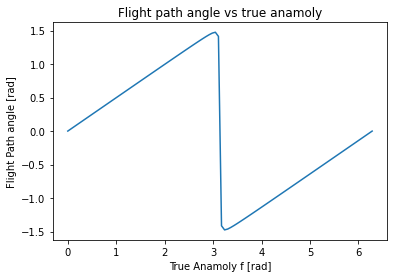

In [427]:
import matplotlib.pyplot as plt
plt.plot(f, gamma)
plt.xlabel("True Anamoly f [rad]")
plt.ylabel("Flight Path angle [rad]")
plt.title("Flight path angle vs true anamoly")

### Part c)

$ tan(0) = \frac{esin(f)}{1+ecos(f)} \rightarrow sin(f) = 0 \rightarrow f = sin^{-1} 0 = 0^o \; or \;180^o \;(\pi)$

In [428]:
r = norm(P)/(1+norm(e) * cos(0))
print("The position magnitude is {:.2f} m".format(r))

The position magnitude is 45064.24 m


From part b we notice that the true anamoly for minimum flight path angle happens at 0 and 180 degrees, which is what we got analytically.

### Part d)

In [429]:
r_p = np.array([r*cos(0), r*sin(0)])
rdot_p = np.sqrt(mu/norm(P)) * np.array([-sin(0), norm(e)+cos(0)])
print("Perifocal position is {} m".format(r_p))
print("Perifocal velocity is {} m/s".format(rdot_p))

Perifocal position is [45064.23512118     0.        ] m
Perifocal velocity is [    -0.         132855.85309895] m/s


# Problem 5:

In [430]:
pi, cos, sin = np.pi, np.cos, np.sin
P, e, i, w, omega, theta = 0.86*6378000, 0.63, 90/180*pi, 170/180*pi, 200/180*pi, 30/180*pi

C_NP = np.matrix([[cos(w)*cos(omega)-sin(w)*cos(i)*sin(omega), cos(w)*sin(omega)+sin(w)*cos(i)*cos(omega), sin(w)*cos(i)],
       [-sin(w)*cos(omega)-cos(w)*cos(i)*sin(omega), -sin(w)*sin(omega)+cos(w)*cos(i)*cos(omega), cos(w)*sin(i)],
        [sin(i)*sin(omega), -sin(i)*cos(omega), cos(i)]])
C_NP

matrix([[ 9.25416578e-01,  3.36824089e-01,  1.06328842e-17],
        [ 1.63175911e-01,  5.93911746e-02, -9.84807753e-01],
        [-3.42020143e-01,  9.39692621e-01,  6.12323400e-17]])

In [431]:
C_NP.T.all() == np.linalg.inv(C_NP).all() #check if matrix is orthonormal

True

### Part a)

In [432]:
h = (mu*P)**0.5
#n = np.arccos(h)
r = P / (1+e*cos(theta))
r_p = np.array([r*cos(theta), r*sin(theta), 0])
rdot_p = np.sqrt(mu/P) * np.array([-sin(theta), e+cos(theta), 0])
print("Perifocal position is {} m".format(r_p))
print("Perifocal velocity is {} m/s".format(rdot_p))

Perifocal position is [3073389.55866579 1774422.28902028       0.        ] m
Perifocal velocity is [-4262.33095811 12753.11078535     0.        ] m/s


### Part b)

In [433]:
C_NP
r_eci = C_NP.T @ r_p.T
rdot_eci = C_NP.T @ rdot_p.T
print("Position in ECI frame is {} m".format(r_eci))
print("Velocity in ECI frame is {} m/s".format(rdot_eci))

Position in ECI frame is [[ 3133708.62327072  1140576.66173386 -1747464.82734484]] m
Velocity in ECI frame is [[ -1863.43125865   -678.23351175 -12559.36237644]] m/s


### Part c)

# Problem 6:

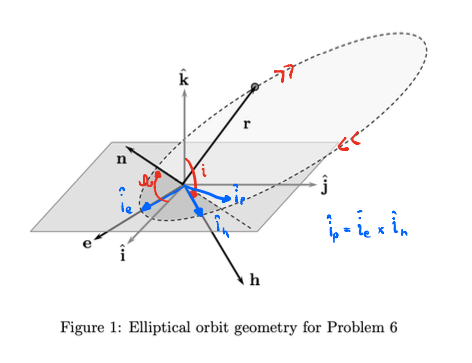

### a)
$i = cos^{-1}\frac{-1}{2} = 120^o$

### b)
Retrograde since $ i > \frac{\pi}{2}$

### C)
Since the projection of n onto i and j are equal, it means n points 45 degrees from the x axis. And by definition, the ascending node would equal to $\Omega = 45^o$

### d)
$ w = cos^{-1} 0 = \frac{\pi}{2}$

### f)
The true anamoly is the angle between the direction of periapsis and the spacecraft position. Thus $cos(f) = \frac{\vec{e} \cdot \vec{r}}{e \cdot r} = \frac{-\sqrt{2}}{2} \frac{ \frac{ae(1-e^2)}{1+e cos(f)} } {\frac{P e}{1+ecos(f)} }$ Since $P=a(1-e^2)$, $$cos(f) = \frac{-\sqrt{2}}{2}$$ 
$$ f = 135^o $$

# Appendix: MATLAB Code